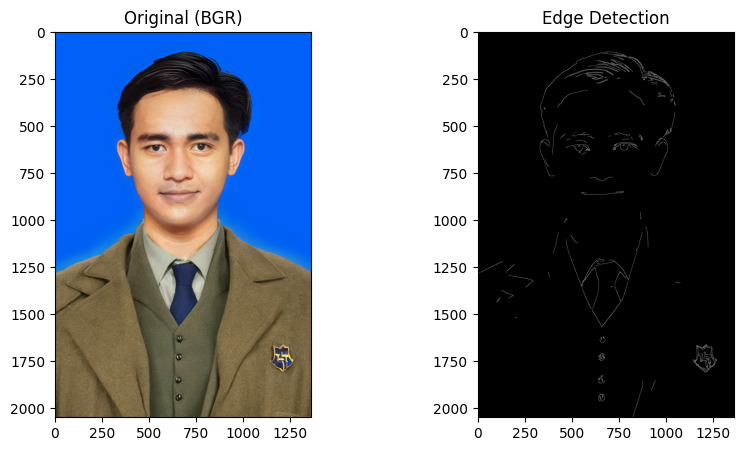

In [1]:
import cv2
import matplotlib.pyplot as plt

# 1. Baca gambar
img = cv2.imread('test.png')

# 2. Ubah ke Grayscale (Wajib sebelum deteksi tepi)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 3. Deteksi Tepi (Canny Edge Detection)
# Angka 100 dan 200 adalah nilai threshold (bisa diubah-ubah)
edges = cv2.Canny(gray, 100, 200)

# 4. Tampilkan Hasil
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.title("Original (BGR)")
# Matplotlib membaca RGB, OpenCV membaca BGR, jadi perlu dibalik
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Edge Detection")
plt.imshow(edges, cmap='gray')

plt.show()

Ditemukan 1 wajah!


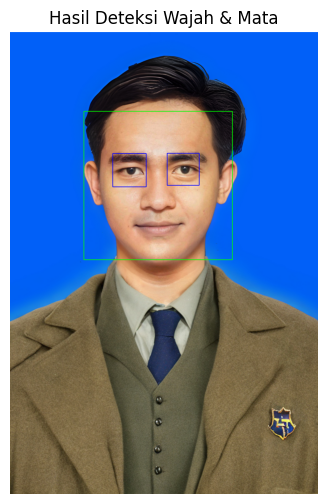

In [3]:
import cv2
import matplotlib.pyplot as plt

# 1. Load model "cetakan wajah" dan "mata" bawaan OpenCV
# Kita pakai path otomatis dari library cv2 biar tidak perlu download manual
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# 2. Baca gambar
img = cv2.imread('test.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Tetap harus di-grayscale dulu!

# 3. Lakukan deteksi wajah
# scaleFactor=1.1: Memperkecil gambar 10% setiap skala cek (biar wajah besar/kecil terdeteksi)
# minNeighbors=5: Semakin besar angkanya, semakin ketat seleksinya (mengurangi salah deteksi)
faces = face_cascade.detectMultiScale(gray, 1.1, 5)

print(f"Ditemukan {len(faces)} wajah!")

# 4. Gambar kotak di setiap wajah yang ditemukan
for (x, y, w, h) in faces:
    # Gambar kotak warna Hijau (0, 255, 0) dengan tebal 2
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    # --- Opsional: Deteksi Mata di dalam area wajah saja ---
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        # Gambar kotak warna Biru (255, 0, 0) di mata
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (255, 0, 0), 2)

# 5. Tampilkan Hasil
plt.figure(figsize=(8,6))
plt.title("Hasil Deteksi Wajah & Mata")
# Convert BGR ke RGB biar warnanya benar di Matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off') # Hilangkan sumbu x/y biar rapi
plt.show()

In [4]:
import cv2

# 1. Buka akses ke Webcam
# Angka 0 biasanya adalah webcam default laptop.
cap = cv2.VideoCapture(0)

# Load model wajah (sama seperti sebelumnya)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

print("Tekan tombol 'q' di keyboard untuk berhenti.")

while True:
    # 2. Baca frame dari webcam (frame by frame)
    ret, frame = cap.read()
    
    if not ret:
        print("Gagal membaca frame kamera.")
        break

    # 3. Ubah ke Grayscale (agar deteksi lebih cepat)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 4. Deteksi Wajah
    faces = face_cascade.detectMultiScale(gray, 1.1, 5)

    # 5. Gambar kotak di wajah
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
        # Tambahkan teks "Wajah" di atas kotak
        cv2.putText(frame, 'Wajah', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # 6. Tampilkan jendela video
    cv2.imshow('Kamera Deteksi Wajah', frame)

    # 7. Tombol Keluar: Tekan 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Bersihkan memori saat selesai
cap.release()
cv2.destroyAllWindows()

Tekan tombol 'q' di keyboard untuk berhenti.


In [6]:
import cv2
import os

# 1. Siapkan Kamera & Model Deteksi
cam = cv2.VideoCapture(0)
face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# 2. Masukkan ID user (misal: 1 untuk kamu)
face_id = input('\n Masukkan ID User (angka, misal 1): ')
print("\n [INFO] Menyalakan kamera... Tatap kamera dan tunggu sebentar...")

# 3. Hitung jumlah foto yang sudah diambil
count = 0

# Buat folder 'dataset' jika belum ada
if not os.path.exists('dataset'):
    os.makedirs('dataset')

while(True):
    ret, img = cam.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_detector.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
        # Gambar kotak biar tahu sedang mendeteksi
        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)     
        
        # Tambah hitungan foto
        count += 1
        
        # 4. SIMPAN foto wajah (hanya area kotak) ke folder dataset
        # Format nama file: User.ID.Urutan.jpg
        cv2.imwrite("dataset/User." + str(face_id) + '.' + str(count) + ".jpg", gray[y:y+h,x:x+w])
        
        print(f"Ambil data ke-{count}")

    cv2.imshow('Ambil Data Wajah', img)

    # Berhenti jika tekan 'q' ATAU sudah ambil 30 foto
    k = cv2.waitKey(100) & 0xff 
    if k == ord('q'):
        break
    elif count >= 30: 
         break

print("\n [INFO] Pengambilan data selesai. Cek folder 'dataset'.")
cam.release()
cv2.destroyAllWindows()


 [INFO] Menyalakan kamera... Tatap kamera dan tunggu sebentar...
Ambil data ke-1
Ambil data ke-2
Ambil data ke-3
Ambil data ke-4
Ambil data ke-5
Ambil data ke-6
Ambil data ke-7
Ambil data ke-8
Ambil data ke-9
Ambil data ke-10
Ambil data ke-11
Ambil data ke-12
Ambil data ke-13
Ambil data ke-14
Ambil data ke-15
Ambil data ke-16
Ambil data ke-17
Ambil data ke-18
Ambil data ke-19
Ambil data ke-20
Ambil data ke-21
Ambil data ke-22
Ambil data ke-23
Ambil data ke-24
Ambil data ke-25
Ambil data ke-26
Ambil data ke-27
Ambil data ke-28
Ambil data ke-29
Ambil data ke-30

 [INFO] Pengambilan data selesai. Cek folder 'dataset'.


In [7]:
import cv2
import numpy as np
from PIL import Image
import os

# Path ke folder dataset gambar
path = 'dataset'

# Gunakan algoritma LBPH (Local Binary Patterns Histograms)
# Algoritma ini bagus karena tahan terhadap perubahan cahaya
recognizer = cv2.face.LBPHFaceRecognizer_create()

# Fungsi untuk mengambil gambar dan label (ID)
def getImagesAndLabels(path):
    # Ambil semua path file di folder dataset
    imagePaths = [os.path.join(path,f) for f in os.listdir(path)]     
    faceSamples=[]
    ids = []

    for imagePath in imagePaths:
        # Lewati file yang bukan gambar (jika ada file sistem aneh)
        if os.path.split(imagePath)[-1].split(".")[-1] != 'jpg':
            continue

        # Konversi gambar ke grayscale dan ubah jadi array angka
        PIL_img = Image.open(imagePath).convert('L')
        img_numpy = np.array(PIL_img,'uint8')

        # Ambil ID dari nama file: "User.1.5.jpg" -> ID = 1
        id = int(os.path.split(imagePath)[-1].split(".")[1])
        
        # Masukkan data wajah dan ID ke list
        faceSamples.append(img_numpy)
        ids.append(id)

    return faceSamples,ids

print("\n [INFO] Sedang melatih mesin... Tunggu sebentar...")

# Panggil fungsi di atas
faces, ids = getImagesAndLabels(path)

# Mulai training!
recognizer.train(faces, np.array(ids))

# Buat folder 'trainer' kalau belum ada
if not os.path.exists('trainer'):
    os.makedirs('trainer')

# Simpan hasil latihan ke file .yml
recognizer.write('trainer/trainer.yml') 

print(f"\n [INFO] Sukses! {len(np.unique(ids))} wajah telah dipelajari.")
print(" [INFO] File model disimpan di folder 'trainer/trainer.yml'")


 [INFO] Sedang melatih mesin... Tunggu sebentar...

 [INFO] Sukses! 1 wajah telah dipelajari.
 [INFO] File model disimpan di folder 'trainer/trainer.yml'


In [9]:
import cv2
import numpy as np
import os 
from datetime import datetime

def markAtendance(name):
    #cek jika file sudah ada
    if not os.path.exists('Absensi.csv'):
        with open('Absensi.csv', 'w') as f:
            f.write('Name,Date,Time\n')
    with open('Absensi.csv','r+') as f:
        myDataList = f.readlines()
        nameList = []
        for line in myDataList:
            entry = line.split(',')
            nameList.append(entry[0])
        if name not in nameList:
            now = datetime.now()
            dtString = now.strftime('%Y-%m-%d,%H:%M:%S')
            f.writelines(f'\n{name},{dtString}')
            print(f'Absensi tercatat untuk {name} pada {dtString}')

# 1. Siapkan Recognizer dan Load Model yang sudah dilatih
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read('trainer/trainer.yml')

# Load Cascade untuk deteksi wajah (sama kayak sebelumnya)
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

font = cv2.FONT_HERSHEY_SIMPLEX

# 2. Inisialisasi ID
id = 0

# DAFTAR NAMA:
# Ingat, tadi kita pakai ID = 1 untuk wajahmu.
# Array dimulai dari index 0, jadi 'None' untuk index 0, dan namamu di index 1.
names = ['None', 'Sagita', 'User 2', 'User 3'] 

# Mulai Video
cam = cv2.VideoCapture(0)
cam.set(3, 640) # Lebar video
cam.set(4, 480) # Tinggi video

# Tentukan ukuran minimum wajah yang akan dideteksi
minW = 0.1 * cam.get(3)
minH = 0.1 * cam.get(4)

while True:
    ret, img = cam.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    faces = faceCascade.detectMultiScale( 
        gray,
        scaleFactor = 1.2,
        minNeighbors = 5,
        minSize = (int(minW), int(minH)),
       )

    for(x,y,w,h) in faces:
        cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
        
        # 3. TEBAK WAJAH SIAPA INI?
        # Fungsi predict mengembalikan ID dan Confidence (tingkat ketidakmiripan)
        id, confidence = recognizer.predict(gray[y:y+h,x:x+w])

        # Jika confidence < 100, berarti wajah cocok (semakin kecil angka, semakin mirip)
        if (confidence < 100):
            name = names[id]
            # Kita ubah confidence jadi persentase kecocokan (biar enak dilihat)
            confidence_text = "  {0}%".format(round(100 - confidence))
        else:
            name = "Tidak Dikenal"
            confidence_text = "  {0}%".format(round(100 - confidence))

        # Tampilkan Nama dan Persentase di Layar
        cv2.putText(img, str(name), (x+5,y-5), font, 1, (255,255,255), 2)
        cv2.putText(img, str(confidence_text), (x+5,y+h-5), font, 1, (255,255,0), 1)  
        
        if (confidence < 100):
            name = names[id]
            confidence_text = "  {0}%".format(round(100 - confidence))
            markAtendance(name)
        else:
            name = "Tidak Dikenal"
            confidence_text = "  {0}%".format(round(100 - confidence))

    cv2.imshow('Face Recognition',img) 

    k = cv2.waitKey(10) & 0xff 
    if k == ord('q'):
        break

print("\n [INFO] Program berhenti.")
cam.release()
cv2.destroyAllWindows()

Absensi tercatat untuk Sagita pada 2026-01-22,11:30:26

 [INFO] Program berhenti.
